In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [4]:
raw = pd.read_csv('./Laptop_price.csv')
raw

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
raw.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [7]:
raw['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df = raw
df['Brand'] = encoder.fit_transform(df['Brand'])
usd = 0.012
rupiah = 191.04
df['Price'] = df['Price'] * usd
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,208.741117
1,0,2.912833,4,1000,11.311372,3.260012,379.291271
2,4,3.241627,4,256,11.853023,2.029061,111.492283
3,0,3.806248,16,512,12.280360,4.573865,209.240740
4,0,3.268097,32,1000,14.990877,4.193472,395.015889
...,...,...,...,...,...,...,...
995,3,3.343584,4,1000,12.587095,3.162399,379.124016
996,2,2.780555,8,256,12.679356,3.750265,109.794262
997,2,3.200569,4,512,12.666315,3.392612,198.628857
998,1,1.604182,8,256,11.215581,3.857613,112.889682


##NORMALIZED

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=raw.columns)
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,-0.681111,1.476128,0.045524,-0.231664,-1.684219,-0.953490,-0.234976
1,-1.393570,0.221788,-1.047057,1.326040,-1.610189,-0.238893,1.276775
2,1.456266,0.671310,-1.047057,-1.048819,-1.292510,-1.660138,-1.096986
3,-1.393570,1.443251,0.045524,-0.231664,-1.041877,1.278069,-0.230547
4,-1.393570,0.707499,1.502299,1.326040,0.547843,0.838871,1.416157
...,...,...,...,...,...,...,...
995,0.743807,0.810704,-1.047057,1.326040,-0.861977,-0.351596,1.275292
996,0.031348,0.040939,-0.682863,-1.048819,-0.807865,0.327148,-1.112038
997,0.031348,0.615176,-1.047057,-0.231664,-0.815514,-0.085795,-0.324611
998,-0.681111,-1.567379,-0.682863,-1.048819,-1.666370,0.451091,-1.084600


##NOT CROSS VALIDATED

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

X = df.drop(columns="Price")
Y = df['Price']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

## MLR
MLR = LinearRegression()

MLR.fit(X1_train, Y1_train)
MLR_pred = MLR.predict(X1_test)

print("MLR RESULTS:")
mlr_rmse = np.sqrt(mean_squared_error(Y1_test, MLR_pred))
print(f"MLR RMSE: {mlr_rmse:.2f}")
mlr_r2 = r2_score(Y1_test, MLR_pred)
print(f"MLR R2: {mlr_r2:.2f}")
mlr_mae = mean_absolute_error(Y1_test, MLR_pred)
print(f"MLR MAE: {mlr_mae:.2f}")
mlr_mape = mean_absolute_percentage_error(Y1_test, MLR_pred)
print(f"MLR MAPE: {mlr_mape:.2%}")
print("")

## ANN
ANN = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=1000, solver='adam', random_state = 42)

ANN.fit(X1_train, Y1_train)
ANN_pred = ANN.predict(X1_test)

print("ANN RESULTS:")
ann_rmse = np.sqrt(mean_squared_error(Y1_test, ANN_pred))
print(f"ANN RMSE: {ann_rmse:.2f}")
ann_r2 = r2_score(Y1_test, ANN_pred)
print(f"ANN R2: {ann_r2:.2f}")
ann_mae = mean_absolute_error(Y1_test, ANN_pred)
print(f"ANN MAE: {ann_mae:.2f}")
ann_mape = mean_absolute_percentage_error(Y1_test, ANN_pred)
print(f"ANN MAPE: {ann_mape:.2%}")
print("")

## RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state=42)
rf.fit(X1_train, Y1_train)
rf_pred = rf.predict(X1_test)

print("RANDOM FOREST RESULTS:")
rf_rmse = np.sqrt(mean_squared_error(Y1_test, rf_pred))
print(f"RF RMSE: {rf_rmse:.2f}")
rf_r2 = r2_score(Y1_test, rf_pred)
print(f"RF R2: {rf_r2:.2f}")
rf_mae = mean_absolute_error(Y1_test, rf_pred)
print(f"RF MAE: {rf_mae:.2f}")
rf_mape = mean_absolute_percentage_error(Y1_test, rf_pred)
print(f"RF MAPE: {rf_mape:.2%}")
print("")

## SVR
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
svr.fit(X1_train, Y1_train)
svr_pred = svr.predict(X1_test)
svr_pred_train = svr.predict(X1_train)

print("SUPPORT VECTOR REGRESSOR RESULTS:")
svr_rmse = np.sqrt(mean_squared_error(Y1_test, svr_pred))
print(f"SVR RMSE: {svr_rmse:.2f}")
svr_r2 = r2_score(Y1_test, svr_pred)
print(f"SVR R2: {svr_r2:.2f}")
svr_mae = mean_absolute_error(Y1_test, svr_pred)
print(f"SVR MAE: {svr_mae:.2f}")
svr_mape = mean_absolute_percentage_error(Y1_test, svr_pred)
print(f"SVR MAPE: {svr_mape:.2%}")
print("")

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
GBR.fit(X1_train, Y1_train)
gbr_pred = GBR.predict(X1_test)

print("Gradient Boosting Regressor RESULTS:")
gbr_rmse = np.sqrt(mean_squared_error(Y1_test, gbr_pred))
print(f"GBR RMSE: {svr_rmse:.2f}")
gbr_r2 = r2_score(Y1_test, gbr_pred)
print(f"GBR R2: {gbr_r2:.2f}")
gbr_mae = mean_absolute_error(Y1_test, gbr_pred)
print(f"GBR MAE: {gbr_mae:.2f}")
print("")

MLR RESULTS:
MLR RMSE: 0.02
MLR R2: 1.00
MLR MAE: 0.02
MLR MAPE: 3.28%

ANN RESULTS:
ANN RMSE: 0.07
ANN R2: 1.00
ANN MAE: 0.05
ANN MAPE: 11.43%

RANDOM FOREST RESULTS:
RF RMSE: 0.02
RF R2: 1.00
RF MAE: 0.02
RF MAPE: 3.60%

SUPPORT VECTOR REGRESSOR RESULTS:
SVR RMSE: 0.09
SVR R2: 0.99
SVR MAE: 0.07
SVR MAPE: 11.07%

Gradient Boosting Regressor RESULTS:
GBR RMSE: 0.09
GBR R2: 1.00
GBR MAE: 0.02



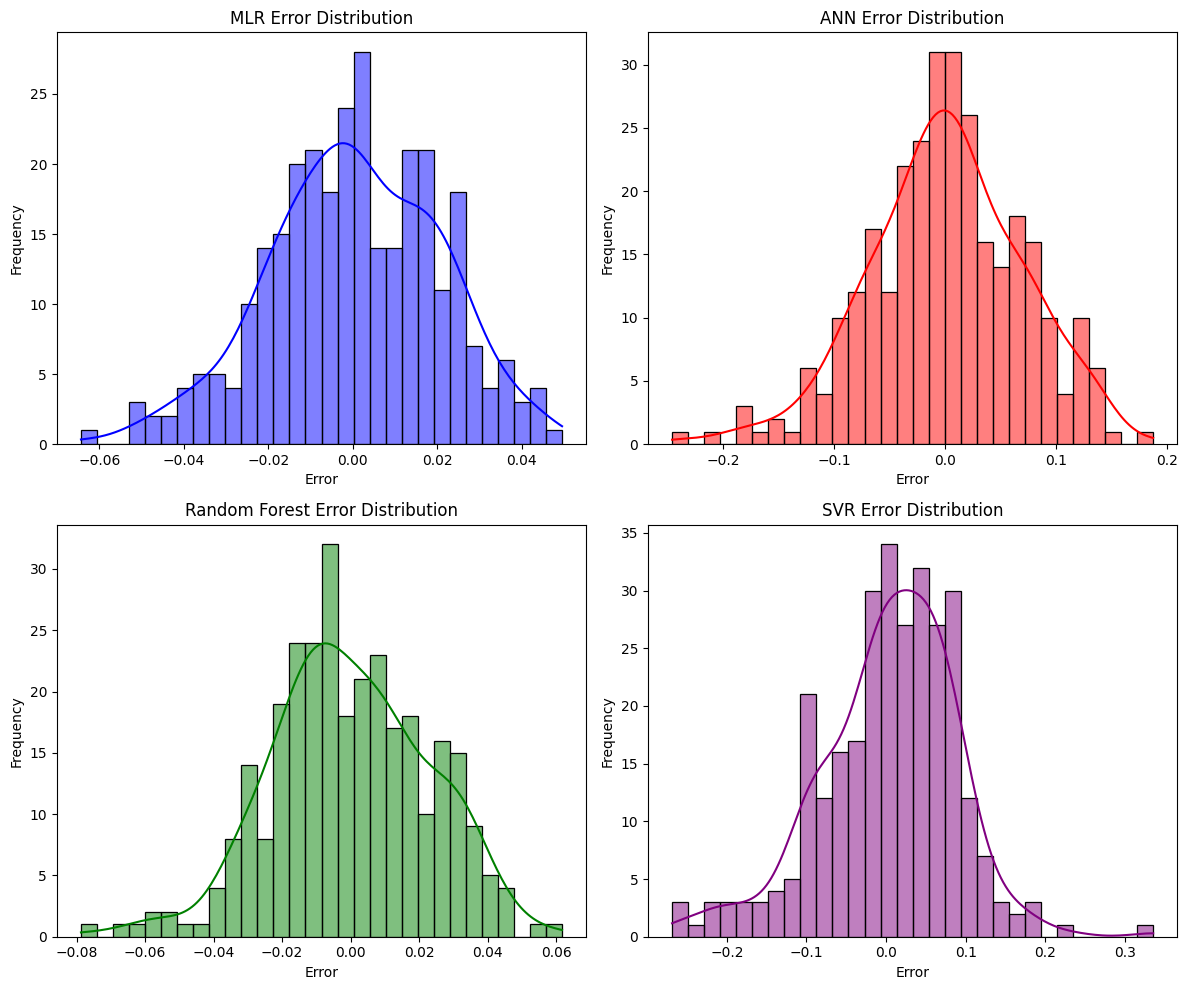

In [38]:
errors_mlr = Y1_test - MLR_pred
errors_ann = Y1_test - ANN_pred
errors_rf = Y1_test - rf_pred
errors_svr = Y1_test - svr_pred

# Plot histograms
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(errors_mlr, kde=True, color='blue', bins=30)
plt.title('MLR Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
# plt.show()

plt.subplot(2, 2, 2)
sns.histplot(errors_ann, kde=True, color='red', bins=30)
plt.title('ANN Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(errors_rf, kde=True, color='green', bins=30)
plt.title('Random Forest Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(errors_svr, kde=True, color='purple', bins=30)
plt.title('SVR Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

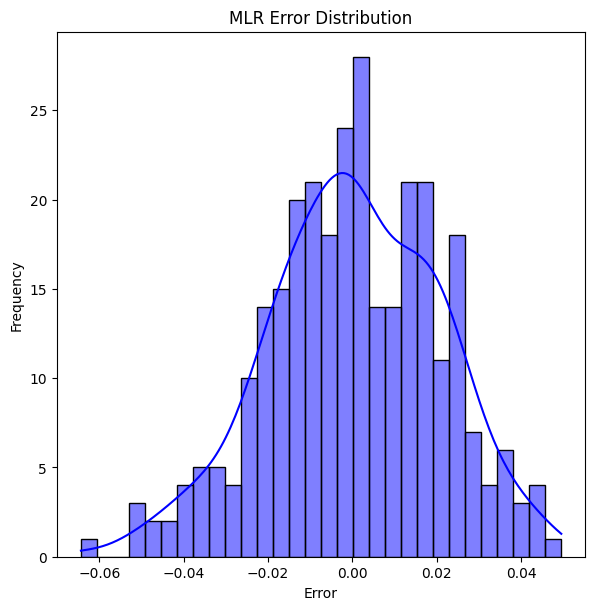

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
sns.histplot(errors_mlr, kde=True, color='blue', bins=30)
plt.title('MLR Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

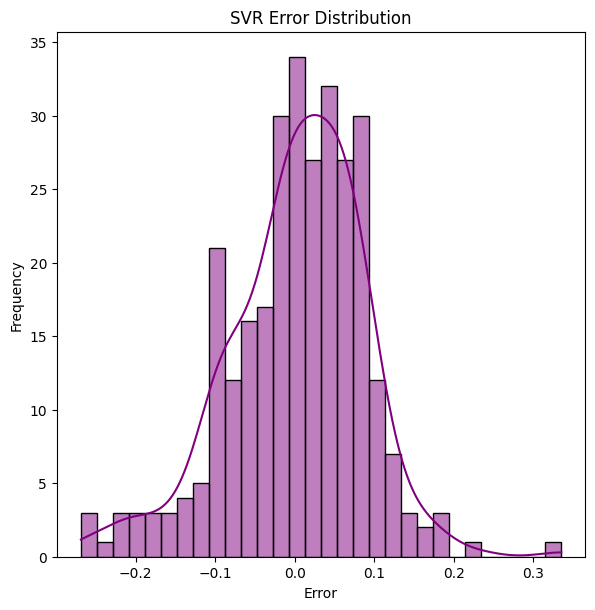

In [33]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 4)
sns.histplot(errors_svr, kde=True, color='purple', bins=30)
plt.title('SVR Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

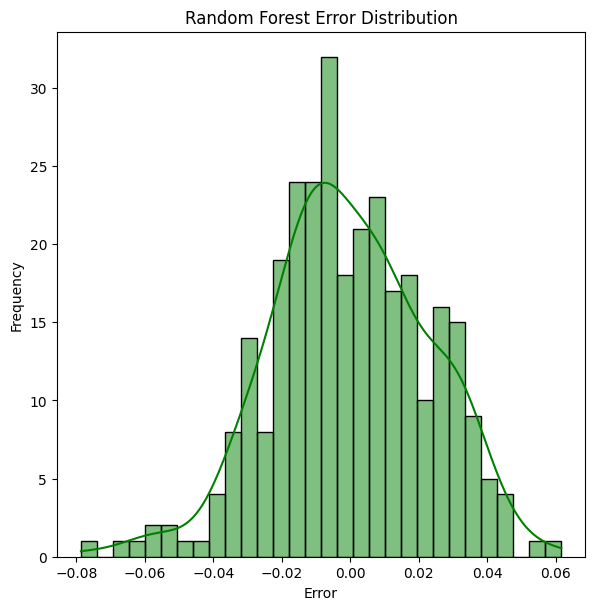

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 3)
sns.histplot(errors_rf, kde=True, color='green', bins=30)
plt.title('Random Forest Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

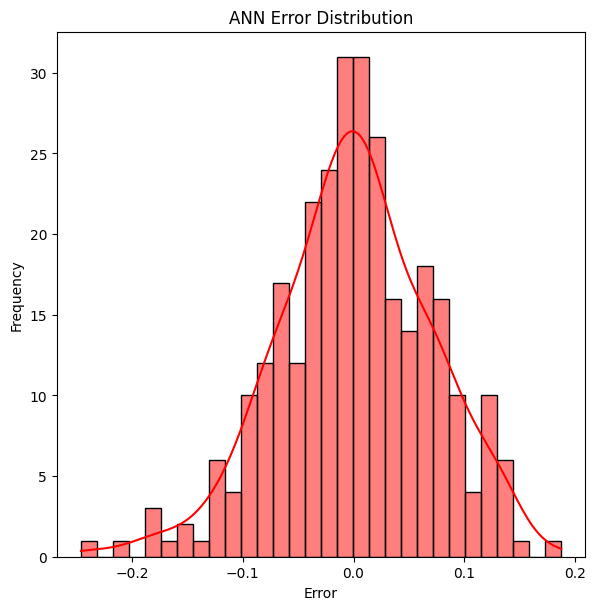

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 2)
sns.histplot(errors_ann, kde=True, color='red', bins=30)
plt.title('ANN Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

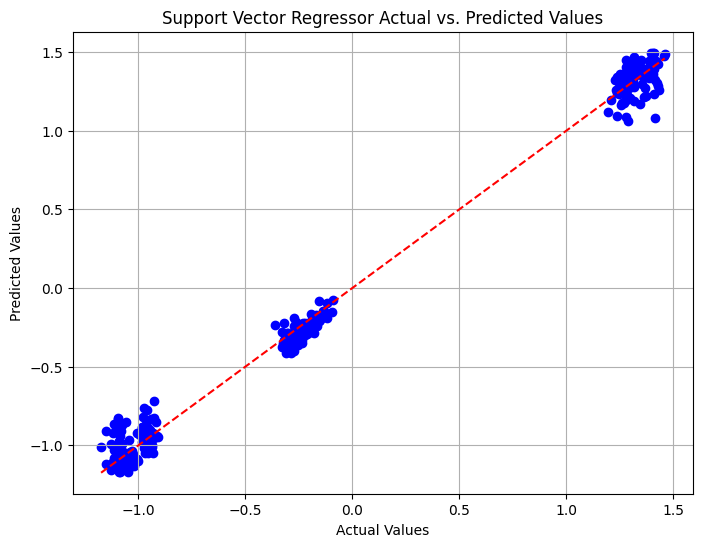

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(Y1_test, svr_pred, color='blue')
plt.plot([min(Y1_test), max(Y1_test)], [min(Y1_test), max(Y1_test)], '--', color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regressor Actual vs. Predicted Values')
plt.grid(True)
plt.show()

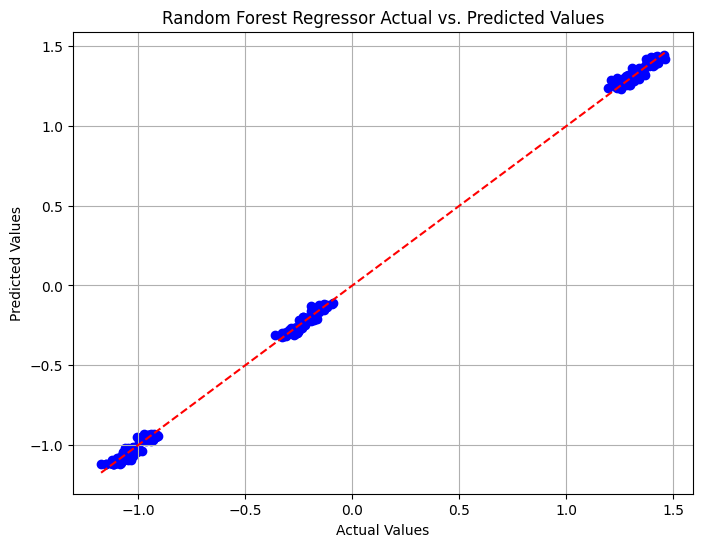

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(Y1_test, rf_pred, color='blue')
plt.plot([min(Y1_test), max(Y1_test)], [min(Y1_test), max(Y1_test)], '--', color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Actual vs. Predicted Values')
plt.grid(True)
plt.show()

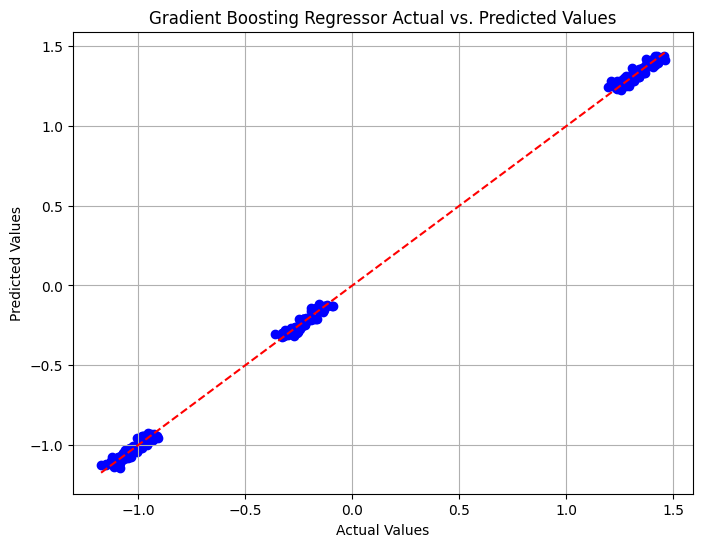

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(Y1_test, gbr_pred, color='blue')
plt.plot([min(Y1_test), max(Y1_test)], [min(Y1_test), max(Y1_test)], '--', color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regressor Actual vs. Predicted Values')
plt.grid(True)
plt.show()

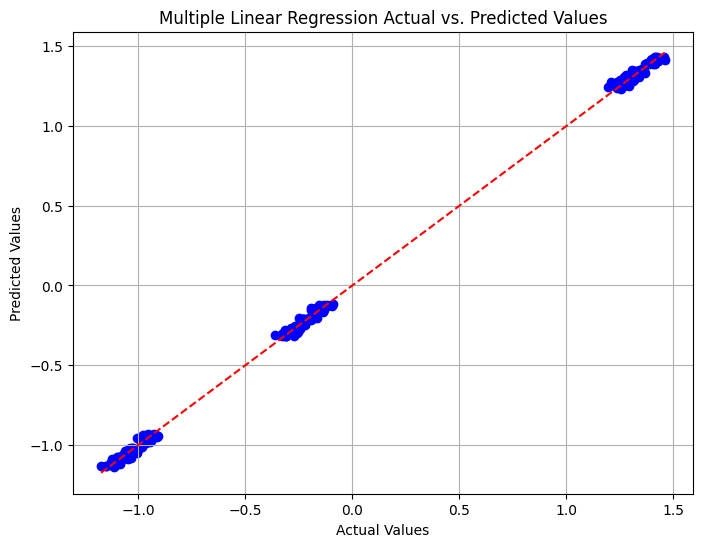

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(Y1_test, MLR_pred, color='blue')
plt.plot([min(Y1_test), max(Y1_test)], [min(Y1_test), max(Y1_test)], '--', color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Regression Actual vs. Predicted Values')
plt.grid(True)
plt.show()

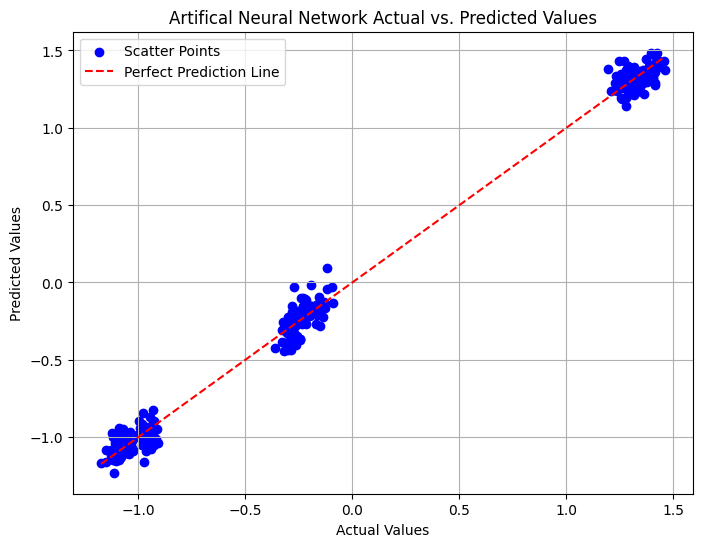

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(Y1_test, ANN_pred, color='blue')
plt.plot([min(Y1_test), max(Y1_test)], [min(Y1_test), max(Y1_test)], '--', color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Artifical Neural Network Actual vs. Predicted Values')
plt.legend(labels=['Scatter Points', 'Perfect Prediction Line'])
plt.grid(True)
plt.show()

In [40]:
pip install matplotlib graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
